In [89]:
import numpy as np
import pandas as pd

vin=pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')   

ds_train = vin.sample(frac=0.7, random_state=0)
ds_valid = vin.drop(ds_train.index)

maxi = ds_train.max(axis=0)
mini = ds_train.min(axis=0)
ds_train = (ds_train - mini) / (maxi - mini)
ds_valid = (ds_valid - mini) / (maxi - mini)
#catégorie
X_train = ds_train.drop('quality', axis=1)
X_valid = ds_valid.drop('quality', axis=1)

Y_train = ds_train['quality']
Y_valid = ds_valid['quality']

print(vin.describe())
print(X_train.shape)


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [90]:
from tensorflow import keras
from keras import layers
from keras.callbacks import EarlyStopping

early= EarlyStopping(min_delta=0.001 , patience=20 , restore_best_weights=True,)
model = keras.Sequential([
    layers.Dense(1024,activation='relu',input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024,activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),]
)

pandas.core.frame.DataFrame

In [93]:
model.compile(
    optimizer='adam',
    loss='mae', 
)

history = model.fit(
    X_train,Y_train,
    validation_data=(X_valid,Y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early],
    verbose=1,
)




Epoch 1/500
5/5 [==============================] - 1s 113ms/step - loss: 0.5346 - val_loss: 0.2244
Epoch 2/500
5/5 [==============================] - 0s 69ms/step - loss: 0.5399 - val_loss: 0.1432
Epoch 3/500
5/5 [==============================] - 0s 67ms/step - loss: 0.4742 - val_loss: 0.1337
Epoch 4/500
5/5 [==============================] - 0s 65ms/step - loss: 0.4233 - val_loss: 0.1541
Epoch 5/500
5/5 [==============================] - 0s 72ms/step - loss: 0.3949 - val_loss: 0.1289
Epoch 6/500
5/5 [==============================] - 0s 67ms/step - loss: 0.3473 - val_loss: 0.1382
Epoch 7/500
5/5 [==============================] - 0s 64ms/step - loss: 0.3394 - val_loss: 0.1399
Epoch 8/500
5/5 [==============================] - 0s 88ms/step - loss: 0.3049 - val_loss: 0.1399
Epoch 9/500
5/5 [==============================] - 0s 78ms/step - loss: 0.3133 - val_loss: 0.1350
Epoch 10/500
5/5 [==============================] - 0s 77ms/step - loss: 0.2803 - val_loss: 0.1316
Epoch 11/500
5/5 [

Minimum validation loss: 0.13088245689868927


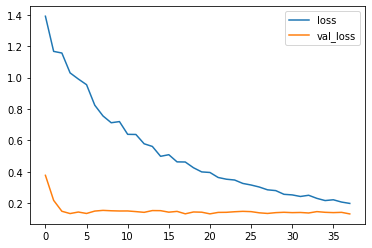

In [92]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))